## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Import Datasets

In [35]:
train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')
sub = pd.read_csv('sample_submission_O1oDc4H.csv')

## Data Preprocessing

In [36]:
train.shape, test.shape, sub.shape

((88858, 10), (59310, 9), (59310, 2))

In [37]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [38]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [39]:
sub.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


## Exploratory Data Analysis

In [40]:
train.duplicated().sum()

0

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [42]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [43]:
# 0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides

view = train.groupby('Crop_Damage')
view.count()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Crop_Damage,,,,,,,,,
0,74238,74238,74238,74238,74238,74238,66743,74238,74238
1,12307,12307,12307,12307,12307,12307,11059,12307,12307
2,2313,2313,2313,2313,2313,2313,2056,2313,2313


In [44]:
new_view = view.count()

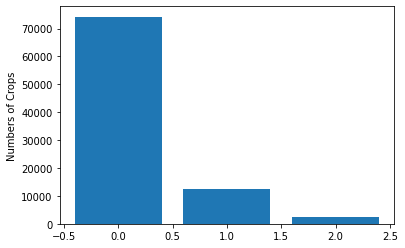

In [45]:
#how many crops were in each category ?

plt.bar(new_view.index.values, new_view['ID'])
plt.ylabel("Numbers of Crops")
plt.show()

In [46]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [47]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [48]:
# train['Number_Weeks_Used'].value_counts()

In [49]:
#Fill with mean
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(method='ffill')

test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(method='ffill')

In [50]:
train_n = pd.get_dummies(train['Crop_Type'], prefix='Crop_Type')
train = pd.concat([train, train_n], axis=1)

test_n = pd.get_dummies(test['Crop_Type'], prefix='Crop_Type')
test = pd.concat([test, test_n], axis=1)

In [51]:
train_m = pd.get_dummies(train['Season'], prefix='Season')
train = pd.concat([train, train_m], axis=1)

test_m = pd.get_dummies(test['Season'], prefix='Season')
test = pd.concat([test, test_m], axis=1)

In [52]:
train_o = pd.get_dummies(train['Pesticide_Use_Category'], prefix='Pesticide_Use_Category')
train = pd.concat([train, train_o], axis=1)

test_o = pd.get_dummies(test['Pesticide_Use_Category'], prefix='Pesticide_Use_Category')
test = pd.concat([test, test_o], axis=1)

In [53]:
train_p = pd.get_dummies(train['Soil_Type'], prefix='Soil_Type')
train = pd.concat([train, train_p], axis=1)

test_p = pd.get_dummies(test['Soil_Type'], prefix='Soil_Type')
test = pd.concat([test, test_p], axis=1)

In [54]:
# train.dropna(inplace=True)
# train.isna().sum()

In [55]:
train['Total_Dose_Used'] = train['Number_Doses_Week'] * train['Number_Weeks_Used']
train['Number_Months_Used'] = train['Number_Weeks_Used'] / 4
train['Total_Week_used'] = train['Number_Weeks_Used'] + train['Number_Weeks_Quit']

test['Total_Dose_Used'] = test['Number_Doses_Week'] * test['Number_Weeks_Used']
test['Number_Months_Used'] = test['Number_Weeks_Used'] / 4
test['Total_Week_used'] = test['Number_Weeks_Used'] + test['Number_Weeks_Quit']

In [56]:
train.columns, test.columns

(Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
        'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'Crop_Type_0',
        'Crop_Type_1', 'Season_1', 'Season_2', 'Season_3',
        'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
        'Pesticide_Use_Category_3', 'Soil_Type_0', 'Soil_Type_1',
        'Total_Dose_Used', 'Number_Months_Used', 'Total_Week_used'],
       dtype='object'),
 Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
        'Number_Weeks_Quit', 'Season', 'Crop_Type_0', 'Crop_Type_1', 'Season_1',
        'Season_2', 'Season_3', 'Pesticide_Use_Category_1',
        'Pesticide_Use_Category_2', 'Pesticide_Use_Category_3', 'Soil_Type_0',
        'Soil_Type_1', 'Total_Dose_Used', 'Number_Months_Used',
        'Total_Week_used'],
       dtype='object'))

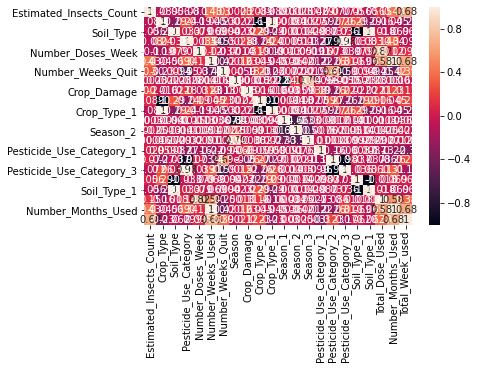

In [57]:
sns.heatmap(train.corr(), annot=True)

In [58]:
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Crop_Type_0,Crop_Type_1,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Soil_Type_0,Soil_Type_1,Total_Dose_Used,Number_Months_Used,Total_Week_used
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.433775,0.299279,0.002304,0.202888,0.088830,-0.088830,-0.003120,0.002503,0.000455,0.028904,0.069512,-0.076502,0.056375,-0.056375,0.145039,0.433775,0.681560
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.044535,-0.233394,0.002161,-0.016495,-1.000000,1.000000,-0.000937,-0.001308,0.002713,0.058619,-0.266833,0.256921,0.287372,-0.287372,-0.156685,-0.044535,-0.233957
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.068634,0.009364,0.002327,-0.021997,0.287372,-0.287372,-0.000999,-0.001428,0.002934,0.008723,-0.037217,0.035716,-1.000000,1.000000,0.017789,-0.068634,-0.061949
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344671,-0.554169,0.002811,0.175002,-0.235779,0.235779,-0.001545,-0.001104,0.003156,-0.266966,-0.910593,0.977956,-0.032657,0.032657,0.137441,0.344671,-0.099243
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.123617,-0.037131,-0.001401,-0.030874,0.192161,-0.192161,0.001346,-0.000508,-0.000911,-0.162061,0.073089,-0.038738,-0.079447,0.079447,0.819247,0.123617,0.095179
Number_Weeks_Used,0.433775,-0.044535,-0.068634,0.344671,0.123617,1.000000,-0.415318,0.001641,0.229116,0.044535,-0.044535,-0.003550,0.004223,-0.001201,-0.224489,-0.257041,0.308369,0.068634,-0.068634,0.575926,1.000000,0.676941
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.415318,1.000000,0.000595,-0.133117,0.233394,-0.233394,0.000720,-0.002158,0.001871,-0.094455,0.608580,-0.594474,-0.009364,0.009364,-0.248107,-0.415318,0.388409
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.001641,0.000595,1.000000,-0.000184,-0.002161,0.002161,-0.842768,0.146202,0.785697,-0.006604,-0.000049,0.001480,-0.002327,0.002327,-0.001331,0.001641,0.002143
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.229116,-0.133117,-0.000184,1.000000,0.016495,-0.016495,-0.003048,0.005859,-0.003825,0.185833,-0.259090,0.221533,0.021997,-0.021997,0.113106,0.229116,0.124384
Crop_Type_0,0.088830,-1.000000,0.287372,-0.235779,0.192161,0.044535,0.233394,-0.002161,0.016495,1.000000,-1.000000,0.000937,0.001308,-0.002713,-0.058619,0.266833,-0.256921,-0.287372,0.287372,0.156685,0.044535,0.233957


In [59]:
# train.dropna(inplace=True)
# train.isna().sum()

In [60]:
train.shape, test.shape

((88858, 23), (59310, 22))

In [61]:
corr_train = train.corr()

In [62]:
pd.options.display.max_rows = 999
corr_train['Crop_Damage'].sort_values(ascending=False)

Crop_Damage                 1.000000
Number_Weeks_Used           0.229116
Number_Months_Used          0.229116
Pesticide_Use_Category_3    0.221533
Estimated_Insects_Count     0.202888
Pesticide_Use_Category_1    0.185833
Pesticide_Use_Category      0.175002
Total_Week_used             0.124384
Total_Dose_Used             0.113106
Soil_Type_0                 0.021997
Crop_Type_0                 0.016495
Season_2                    0.005859
Season                     -0.000184
Season_1                   -0.003048
Season_3                   -0.003825
Crop_Type                  -0.016495
Crop_Type_1                -0.016495
Soil_Type_1                -0.021997
Soil_Type                  -0.021997
Number_Doses_Week          -0.030874
Number_Weeks_Quit          -0.133117
Pesticide_Use_Category_2   -0.259090
Name: Crop_Damage, dtype: float64

In [63]:
# split data into features and target

x = train[['Pesticide_Use_Category_3', 'Number_Weeks_Used', 
'Number_Months_Used', 'Estimated_Insects_Count', 'Pesticide_Use_Category_1', 'Pesticide_Use_Category',
'Total_Week_used', 'Total_Dose_Used', 'Soil_Type_0', 'Crop_Type_0', 'Season_2', 'Crop_Type', 'Crop_Type_1',              
'Soil_Type_1',              
'Soil_Type',                
'Number_Doses_Week',          
'Number_Weeks_Quit',         
'Pesticide_Use_Category_2']]
y=train['Crop_Damage']

test_data = test[['Pesticide_Use_Category_3', 'Number_Weeks_Used', 
'Number_Months_Used', 'Estimated_Insects_Count', 'Pesticide_Use_Category_1', 'Pesticide_Use_Category',
'Total_Week_used', 'Total_Dose_Used', 'Soil_Type_0', 'Crop_Type_0', 'Season_2','Crop_Type', 'Crop_Type_1',              
'Soil_Type_1',              
'Soil_Type',                
'Number_Doses_Week',          
'Number_Weeks_Quit',         
'Pesticide_Use_Category_2']]

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(62200, 18)
(26658, 18)
(62200,)
(26658,)


In [65]:
x_train.isna().any()

Pesticide_Use_Category_3    False
Number_Weeks_Used           False
Number_Months_Used          False
Estimated_Insects_Count     False
Pesticide_Use_Category_1    False
Pesticide_Use_Category      False
Total_Week_used             False
Total_Dose_Used             False
Soil_Type_0                 False
Crop_Type_0                 False
Season_2                    False
Crop_Type                   False
Crop_Type_1                 False
Soil_Type_1                 False
Soil_Type                   False
Number_Doses_Week           False
Number_Weeks_Quit           False
Pesticide_Use_Category_2    False
dtype: bool

## Naive Bayes

In [66]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [68]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8002850926551129
Precision:  0.7902429819397927
Recall:  0.8002850926551129


In [69]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22256
           1       0.38      0.19      0.26      3697
           2       0.11      0.24      0.15       705

    accuracy                           0.80     26658
   macro avg       0.46      0.45      0.44     26658
weighted avg       0.79      0.80      0.79     26658



In [70]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

### Random Forest

In [71]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.8136019206242029
Precision:  0.7764331388024387
Recall:  0.8136019206242029


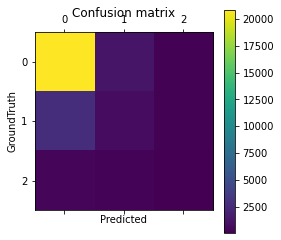

[[20865  1214   177]
 [ 2749   770   178]
 [  427   224    54]]


In [73]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))
conftable(y_test,y_pred,"conf")

# LGB

In [74]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lightgbm = LGBMClassifier()
lgb = lightgbm.fit( x_train, y_train)
y_pred = lgb.predict(x_test)

In [75]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8445494785805386
Precision:  0.7903915459842685
Recall:  0.8445494785805386


In [76]:
test_ypred = lgb.predict(test_data)

In [77]:
test_ypred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# CatBoost

In [78]:
import catboost as ctb
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()
ctb = catboost.fit( x_train, y_train)
y_pred = ctb.predict(x_test)

Learning rate set to 0.09768
0:	learn: 0.9826735	total: 210ms	remaining: 3m 29s
1:	learn: 0.8934205	total: 237ms	remaining: 1m 58s
2:	learn: 0.8230511	total: 260ms	remaining: 1m 26s
3:	learn: 0.7659239	total: 286ms	remaining: 1m 11s
4:	learn: 0.7193899	total: 310ms	remaining: 1m 1s
5:	learn: 0.6801606	total: 334ms	remaining: 55.3s
6:	learn: 0.6471366	total: 357ms	remaining: 50.7s
7:	learn: 0.6188510	total: 382ms	remaining: 47.3s
8:	learn: 0.5944261	total: 406ms	remaining: 44.7s
9:	learn: 0.5736526	total: 440ms	remaining: 43.6s
10:	learn: 0.5561671	total: 466ms	remaining: 41.9s
11:	learn: 0.5407887	total: 492ms	remaining: 40.5s
12:	learn: 0.5274431	total: 517ms	remaining: 39.2s
13:	learn: 0.5157573	total: 541ms	remaining: 38.1s
14:	learn: 0.5055530	total: 566ms	remaining: 37.1s
15:	learn: 0.4969010	total: 590ms	remaining: 36.3s
16:	learn: 0.4892681	total: 617ms	remaining: 35.7s
17:	learn: 0.4825871	total: 643ms	remaining: 35.1s
18:	learn: 0.4767144	total: 677ms	remaining: 35s
19:	learn:

168:	learn: 0.4110264	total: 5.13s	remaining: 25.2s
169:	learn: 0.4109902	total: 5.15s	remaining: 25.2s
170:	learn: 0.4108579	total: 5.18s	remaining: 25.1s
171:	learn: 0.4107120	total: 5.21s	remaining: 25.1s
172:	learn: 0.4106713	total: 5.24s	remaining: 25.1s
173:	learn: 0.4105775	total: 5.27s	remaining: 25s
174:	learn: 0.4104827	total: 5.3s	remaining: 25s
175:	learn: 0.4104186	total: 5.33s	remaining: 24.9s
176:	learn: 0.4103415	total: 5.38s	remaining: 25s
177:	learn: 0.4103007	total: 5.41s	remaining: 25s
178:	learn: 0.4102190	total: 5.45s	remaining: 25s
179:	learn: 0.4101787	total: 5.49s	remaining: 25s
180:	learn: 0.4101388	total: 5.51s	remaining: 24.9s
181:	learn: 0.4100718	total: 5.55s	remaining: 24.9s
182:	learn: 0.4099592	total: 5.58s	remaining: 24.9s
183:	learn: 0.4098964	total: 5.61s	remaining: 24.9s
184:	learn: 0.4098429	total: 5.63s	remaining: 24.8s
185:	learn: 0.4097447	total: 5.66s	remaining: 24.8s
186:	learn: 0.4096902	total: 5.69s	remaining: 24.7s
187:	learn: 0.4095972	tot

327:	learn: 0.4021756	total: 9.25s	remaining: 19s
328:	learn: 0.4021306	total: 9.28s	remaining: 18.9s
329:	learn: 0.4020874	total: 9.31s	remaining: 18.9s
330:	learn: 0.4020547	total: 9.33s	remaining: 18.9s
331:	learn: 0.4020044	total: 9.36s	remaining: 18.8s
332:	learn: 0.4019807	total: 9.38s	remaining: 18.8s
333:	learn: 0.4018817	total: 9.4s	remaining: 18.8s
334:	learn: 0.4018512	total: 9.43s	remaining: 18.7s
335:	learn: 0.4018360	total: 9.45s	remaining: 18.7s
336:	learn: 0.4017869	total: 9.48s	remaining: 18.6s
337:	learn: 0.4017274	total: 9.5s	remaining: 18.6s
338:	learn: 0.4017036	total: 9.52s	remaining: 18.6s
339:	learn: 0.4016568	total: 9.55s	remaining: 18.5s
340:	learn: 0.4016115	total: 9.57s	remaining: 18.5s
341:	learn: 0.4015425	total: 9.6s	remaining: 18.5s
342:	learn: 0.4015201	total: 9.62s	remaining: 18.4s
343:	learn: 0.4014560	total: 9.64s	remaining: 18.4s
344:	learn: 0.4014272	total: 9.66s	remaining: 18.3s
345:	learn: 0.4013903	total: 9.69s	remaining: 18.3s
346:	learn: 0.401

494:	learn: 0.3950320	total: 13.4s	remaining: 13.6s
495:	learn: 0.3949962	total: 13.4s	remaining: 13.6s
496:	learn: 0.3949747	total: 13.4s	remaining: 13.6s
497:	learn: 0.3949273	total: 13.4s	remaining: 13.6s
498:	learn: 0.3949121	total: 13.5s	remaining: 13.5s
499:	learn: 0.3948852	total: 13.5s	remaining: 13.5s
500:	learn: 0.3948422	total: 13.5s	remaining: 13.5s
501:	learn: 0.3948134	total: 13.5s	remaining: 13.4s
502:	learn: 0.3947812	total: 13.6s	remaining: 13.4s
503:	learn: 0.3947543	total: 13.6s	remaining: 13.4s
504:	learn: 0.3947117	total: 13.6s	remaining: 13.3s
505:	learn: 0.3946875	total: 13.6s	remaining: 13.3s
506:	learn: 0.3946575	total: 13.7s	remaining: 13.3s
507:	learn: 0.3946157	total: 13.7s	remaining: 13.3s
508:	learn: 0.3945762	total: 13.7s	remaining: 13.2s
509:	learn: 0.3945532	total: 13.7s	remaining: 13.2s
510:	learn: 0.3945354	total: 13.8s	remaining: 13.2s
511:	learn: 0.3944646	total: 13.8s	remaining: 13.1s
512:	learn: 0.3944509	total: 13.8s	remaining: 13.1s
513:	learn: 

654:	learn: 0.3894179	total: 17.5s	remaining: 9.24s
655:	learn: 0.3893683	total: 17.6s	remaining: 9.22s
656:	learn: 0.3893149	total: 17.6s	remaining: 9.19s
657:	learn: 0.3892492	total: 17.6s	remaining: 9.16s
658:	learn: 0.3892180	total: 17.7s	remaining: 9.13s
659:	learn: 0.3891944	total: 17.7s	remaining: 9.11s
660:	learn: 0.3891433	total: 17.7s	remaining: 9.08s
661:	learn: 0.3891135	total: 17.7s	remaining: 9.05s
662:	learn: 0.3890903	total: 17.8s	remaining: 9.02s
663:	learn: 0.3890777	total: 17.8s	remaining: 8.99s
664:	learn: 0.3890351	total: 17.8s	remaining: 8.97s
665:	learn: 0.3890065	total: 17.8s	remaining: 8.94s
666:	learn: 0.3889571	total: 17.8s	remaining: 8.91s
667:	learn: 0.3889426	total: 17.9s	remaining: 8.88s
668:	learn: 0.3889152	total: 17.9s	remaining: 8.85s
669:	learn: 0.3888725	total: 17.9s	remaining: 8.83s
670:	learn: 0.3888396	total: 17.9s	remaining: 8.8s
671:	learn: 0.3888067	total: 18s	remaining: 8.77s
672:	learn: 0.3887917	total: 18s	remaining: 8.74s
673:	learn: 0.388

813:	learn: 0.3843697	total: 21.6s	remaining: 4.93s
814:	learn: 0.3843442	total: 21.6s	remaining: 4.9s
815:	learn: 0.3843093	total: 21.6s	remaining: 4.88s
816:	learn: 0.3842337	total: 21.7s	remaining: 4.85s
817:	learn: 0.3842036	total: 21.7s	remaining: 4.82s
818:	learn: 0.3841620	total: 21.7s	remaining: 4.8s
819:	learn: 0.3841301	total: 21.7s	remaining: 4.77s
820:	learn: 0.3840903	total: 21.8s	remaining: 4.74s
821:	learn: 0.3840540	total: 21.8s	remaining: 4.71s
822:	learn: 0.3840160	total: 21.8s	remaining: 4.69s
823:	learn: 0.3839706	total: 21.8s	remaining: 4.66s
824:	learn: 0.3839420	total: 21.8s	remaining: 4.63s
825:	learn: 0.3839173	total: 21.9s	remaining: 4.61s
826:	learn: 0.3838970	total: 21.9s	remaining: 4.58s
827:	learn: 0.3838508	total: 21.9s	remaining: 4.55s
828:	learn: 0.3838014	total: 21.9s	remaining: 4.53s
829:	learn: 0.3837759	total: 22s	remaining: 4.5s
830:	learn: 0.3837346	total: 22s	remaining: 4.47s
831:	learn: 0.3837028	total: 22s	remaining: 4.45s
832:	learn: 0.3836805

978:	learn: 0.3792782	total: 25.7s	remaining: 551ms
979:	learn: 0.3792440	total: 25.7s	remaining: 524ms
980:	learn: 0.3792182	total: 25.7s	remaining: 498ms
981:	learn: 0.3791783	total: 25.7s	remaining: 472ms
982:	learn: 0.3791515	total: 25.8s	remaining: 446ms
983:	learn: 0.3791317	total: 25.8s	remaining: 419ms
984:	learn: 0.3790987	total: 25.8s	remaining: 393ms
985:	learn: 0.3790663	total: 25.8s	remaining: 367ms
986:	learn: 0.3790522	total: 25.9s	remaining: 341ms
987:	learn: 0.3790253	total: 25.9s	remaining: 315ms
988:	learn: 0.3789913	total: 25.9s	remaining: 288ms
989:	learn: 0.3789719	total: 25.9s	remaining: 262ms
990:	learn: 0.3789523	total: 26s	remaining: 236ms
991:	learn: 0.3789383	total: 26s	remaining: 210ms
992:	learn: 0.3789205	total: 26s	remaining: 183ms
993:	learn: 0.3789013	total: 26s	remaining: 157ms
994:	learn: 0.3788522	total: 26.1s	remaining: 131ms
995:	learn: 0.3788151	total: 26.1s	remaining: 105ms
996:	learn: 0.3787892	total: 26.1s	remaining: 78.6ms
997:	learn: 0.37875

In [79]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8451496736439342
Precision:  0.7955383819272677
Recall:  0.8451496736439342


In [80]:
cat_test_ypred = ctb.predict(test_data)

In [81]:
cat_test_ypred.flatten()

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

## Logistic Regression

In [82]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [84]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8355840648210668
Precision:  0.7702865572612818
Recall:  0.8355840648210668


In [97]:
# log_ypred = classifier.predict(test_data)

In [64]:
log_ypred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
# Fitting KNeighborsClassifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
# Predicting the Test set results
knc_y_pred = knc.predict(x_test)

In [88]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8355840648210668
Precision:  0.7702865572612818
Recall:  0.8355840648210668


# XGBoost

In [92]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

In [93]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8440618200915297
Precision:  0.7960431915632014
Recall:  0.8440618200915297


In [94]:
xgb_test_ypred = xgb.predict(test_data)

In [95]:
xgb_test_ypred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [89]:
submission_df = pd.DataFrame({'ID': sub['ID'], 'Crop_Damage': test_ypred}) # Creating a submission file
submission_df.to_csv('lgb.csv', index = False)

In [98]:
# submission_df = pd.DataFrame({'ID': sub['ID'], 'Crop_Damage': log_ypred}) # Creating a submission file
# submission_df.to_csv('logpred.csv', index = False)

In [96]:
submission_df = pd.DataFrame({'ID': sub['ID'], 'Crop_Damage': xgb_test_ypred}) # Creating a submission file
submission_df.to_csv('xgb.csv', index = False)